<a href="https://colab.research.google.com/github/w217423151/Midterm-ITAI-1371-Group-4/blob/Maria/Dataset_Manipulation_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score

In [94]:
from google.colab import files
uploaded = files.upload()

Saving adult.csv.zip to adult.csv (1).zip


In [95]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [96]:
print(f"Dataset created with {len(df)} participant")
print(f"Dataset shape: {df.shape}")

Dataset created with 32561 participant
Dataset shape: (32561, 15)


In [97]:
#get basic information about data set
# Get basic information about the dataset
print("Dataset Info:")
print(df.info())

print("\nDataset Shape:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print("\nColumn Names:")
print(df.columns.tolist())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None

Dataset Shape:
Rows: 32561, Columns: 15

Column Names:
['age', 'workclass

In [98]:
#check data types
print("data types:")
print(df.dtypes)

print("\nNumerical Columns:")
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(numerical_cols)

print("\nCategorical Columns:")
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_cols)

data types:
age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

Numerical Columns:
['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

Categorical Columns:
['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']


In [99]:
# Check for missing values
df = pd.read_csv("adult.csv", na_values='?')
print("Missing Values:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
print(missing_df)

Missing Values:
                Missing Count  Missing Percentage
occupation               1843            5.660146
workclass                1836            5.638647
native.country            583            1.790486


In [100]:
# Check for duplicate rows
print(f"Total rows: {len(df)}")
print(f"Unique rows: {len(df.drop_duplicates())}")
print(f"Duplicate rows: {len(df) - len(df.drop_duplicates())}")




Total rows: 32561
Unique rows: 32537
Duplicate rows: 24


In [101]:
# Check for duplicate rows
if len(df) != len(df.drop_duplicates()):
    print("\nDuplicate rows found:")
    duplicates = df[df.duplicated(keep=False)]
    print(duplicates)


Duplicate rows found:
       age         workclass  fnlwgt     education  education.num  \
6227    90           Private   52386  Some-college             10   
7615    19           Private  251579  Some-college             10   
7978    25           Private  308144     Bachelors             13   
8356    21           Private  250051  Some-college             10   
8453    25           Private  308144     Bachelors             13   
8500    38           Private  207202       HS-grad              9   
8645    90           Private   52386  Some-college             10   
9067    27           Private  255582       HS-grad              9   
9269    20           Private  107658  Some-college             10   
9305    25           Private  195994       1st-4th              2   
10307   19           Private  138153  Some-college             10   
10357   49  Self-emp-not-inc   43479  Some-college             10   
11121   49           Private   31267       7th-8th              4   
11261   21 

In [102]:
# Check for outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("Outlier Detection (using IQR method):")
for col in ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']:
    outliers, lower, upper = detect_outliers(df, col)
    print(f"\n{col}:")
    print(f"  Normal range: {lower:.2f} to {upper:.2f}")
    print(f"  Number of outliers: {len(outliers)}")
    print(f"  Percentage of outliers: {len(outliers)/len(df)*100:.2f}%")

Outlier Detection (using IQR method):

age:
  Normal range: -2.00 to 78.00
  Number of outliers: 143
  Percentage of outliers: 0.44%

fnlwgt:
  Normal range: -61009.00 to 415887.00
  Number of outliers: 992
  Percentage of outliers: 3.05%

education.num:
  Normal range: 4.50 to 16.50
  Number of outliers: 1198
  Percentage of outliers: 3.68%

capital.gain:
  Normal range: 0.00 to 0.00
  Number of outliers: 2712
  Percentage of outliers: 8.33%

capital.loss:
  Normal range: 0.00 to 0.00
  Number of outliers: 1519
  Percentage of outliers: 4.67%

hours.per.week:
  Normal range: 32.50 to 52.50
  Number of outliers: 9008
  Percentage of outliers: 27.66%


In [103]:
# Basic summary statistics
print("Summary Statistics for Numerical Variables:")
summary_stats = df.describe()
display(summary_stats.round(2))

Summary Statistics for Numerical Variables:


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.00,32561.00,32561.00,32561.00,32561.00,32561.00
mean,38.58,189778.37,10.08,1077.65,87.30,40.44
std,13.64,105549.98,2.57,7385.29,402.96,12.35
min,17.00,12285.00,1.00,0.00,0.00,1.00
25%,28.00,117827.00,9.00,0.00,0.00,40.00
50%,37.00,178356.00,10.00,0.00,0.00,40.00
75%,48.00,237051.00,12.00,0.00,0.00,45.00
max,90.00,1484705.00,16.00,99999.00,4356.00,99.00


In [104]:
# Additional statistics
print("Additional Statistics:")
additional_stats = pd.DataFrame({
    'Skewness': df[numerical_cols].skew(),
    'Kurtosis': df[numerical_cols].kurtosis(),
    'Variance': df[numerical_cols].var()
})
display(additional_stats.round(3))

Additional Statistics:


,Skewness,Kurtosis,Variance
age,0.559,-0.166,1.860610e+02
fnlwgt,1.447,6.219,1.114080e+10
education.num,-0.312,0.623,6.619000e+00
capital.gain,11.954,154.799,5.454254e+07
capital.loss,4.595,20.377,1.623769e+05
hours.per.week,0.228,2.917,1.524590e+02


In [105]:
# Summary for categorical variables
print("Summary for Categorical Variables:")
for col in categorical_cols:
    print(f"\n{col}:")
    value_counts = df[col].value_counts()
    percentages = df[col].value_counts(normalize=True) * 100
    summary = pd.DataFrame({
        'Count': value_counts,
        'Percentage': percentages })
    print(summary.round(2))

Summary for Categorical Variables:

workclass:
                  Count  Percentage
workclass                          
Private           22696       73.87
Self-emp-not-inc   2541        8.27
Local-gov          2093        6.81
State-gov          1298        4.22
Self-emp-inc       1116        3.63
Federal-gov         960        3.12
Without-pay          14        0.05
Never-worked          7        0.02

education:
              Count  Percentage
education                      
HS-grad       10501       32.25
Some-college   7291       22.39
Bachelors      5355       16.45
Masters        1723        5.29
Assoc-voc      1382        4.24
11th           1175        3.61
Assoc-acdm     1067        3.28
10th            933        2.87
7th-8th         646        1.98
Prof-school     576        1.77
9th             514        1.58
12th            433        1.33
Doctorate       413        1.27
5th-6th         333        1.02
1st-4th         168        0.52
Preschool        51        0.16

mari

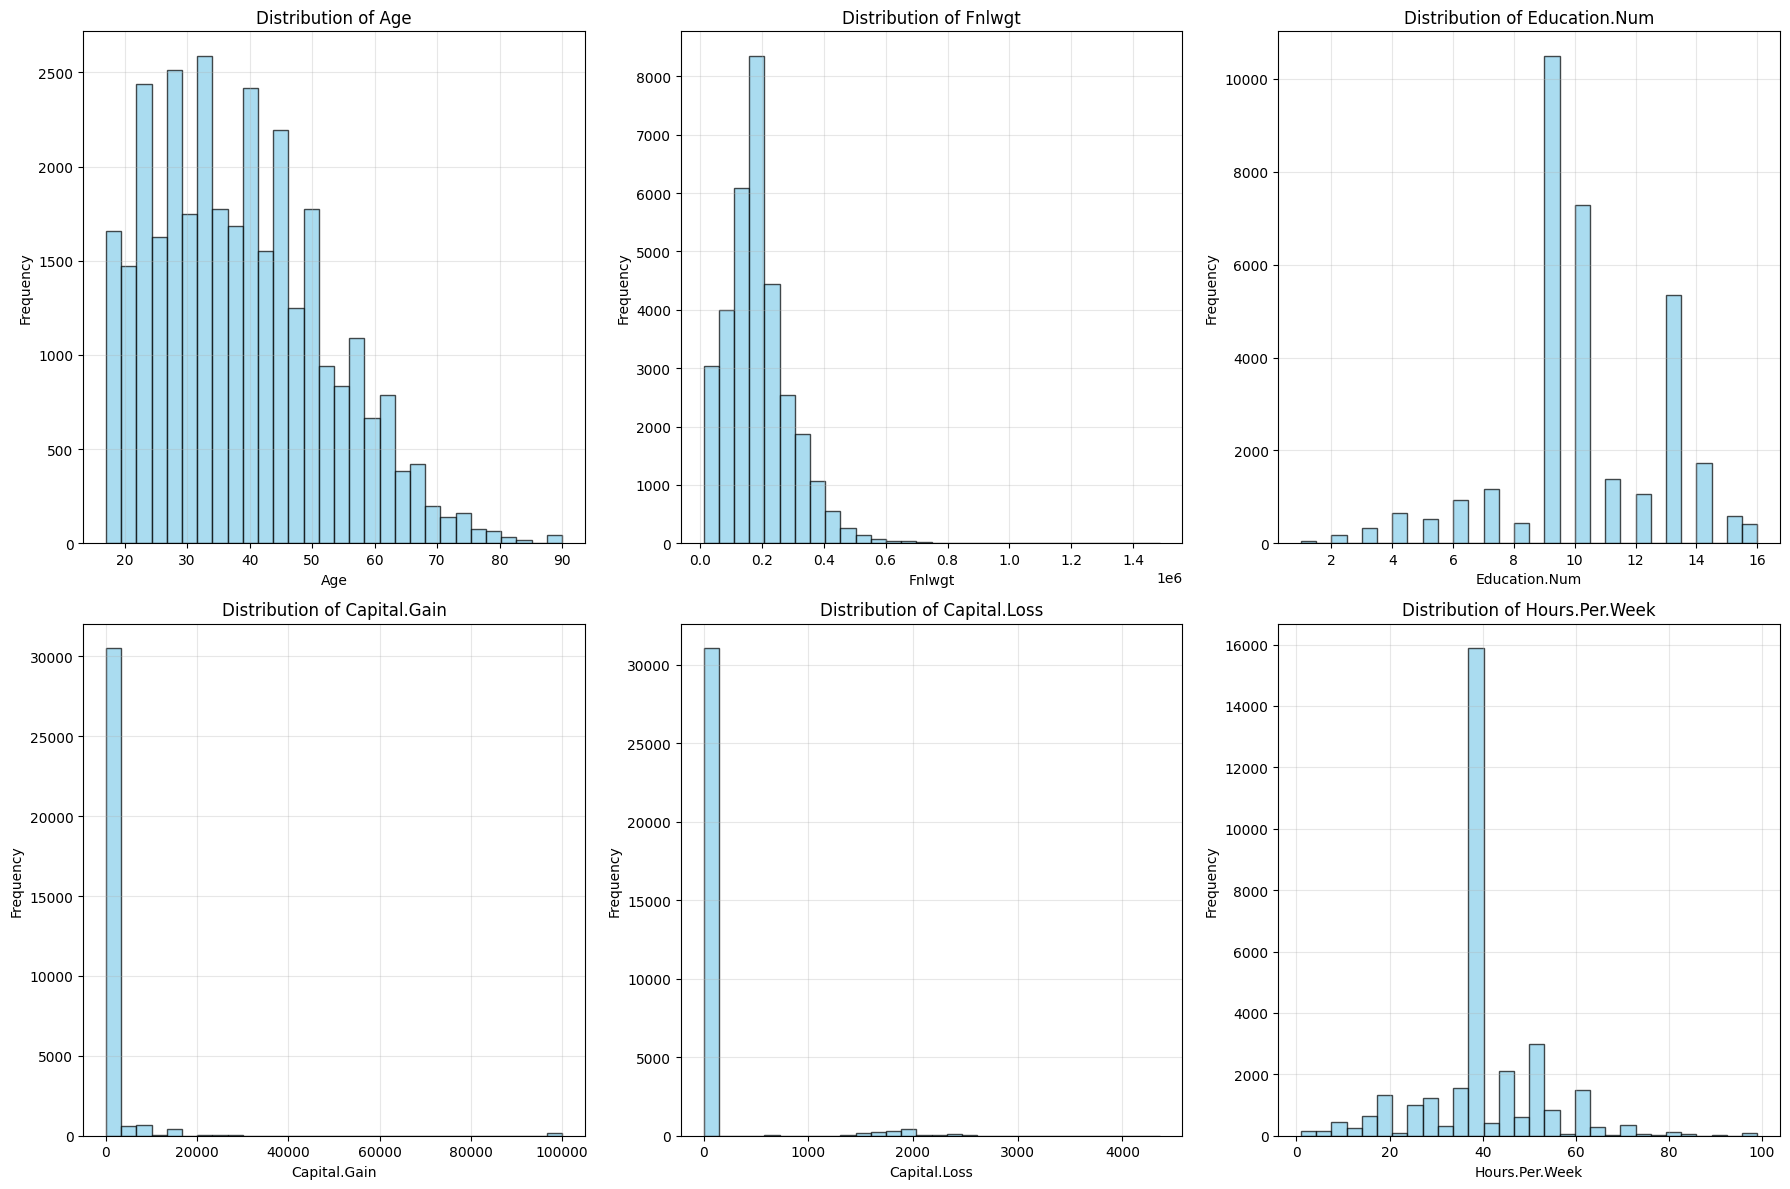

In [106]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

numerical_vars = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

for i, var in enumerate(numerical_vars):
    axes[i].hist(df[var].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {var.replace("_", " ").title()}')
    axes[i].set_xlabel(var.replace("_", " ").title())
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

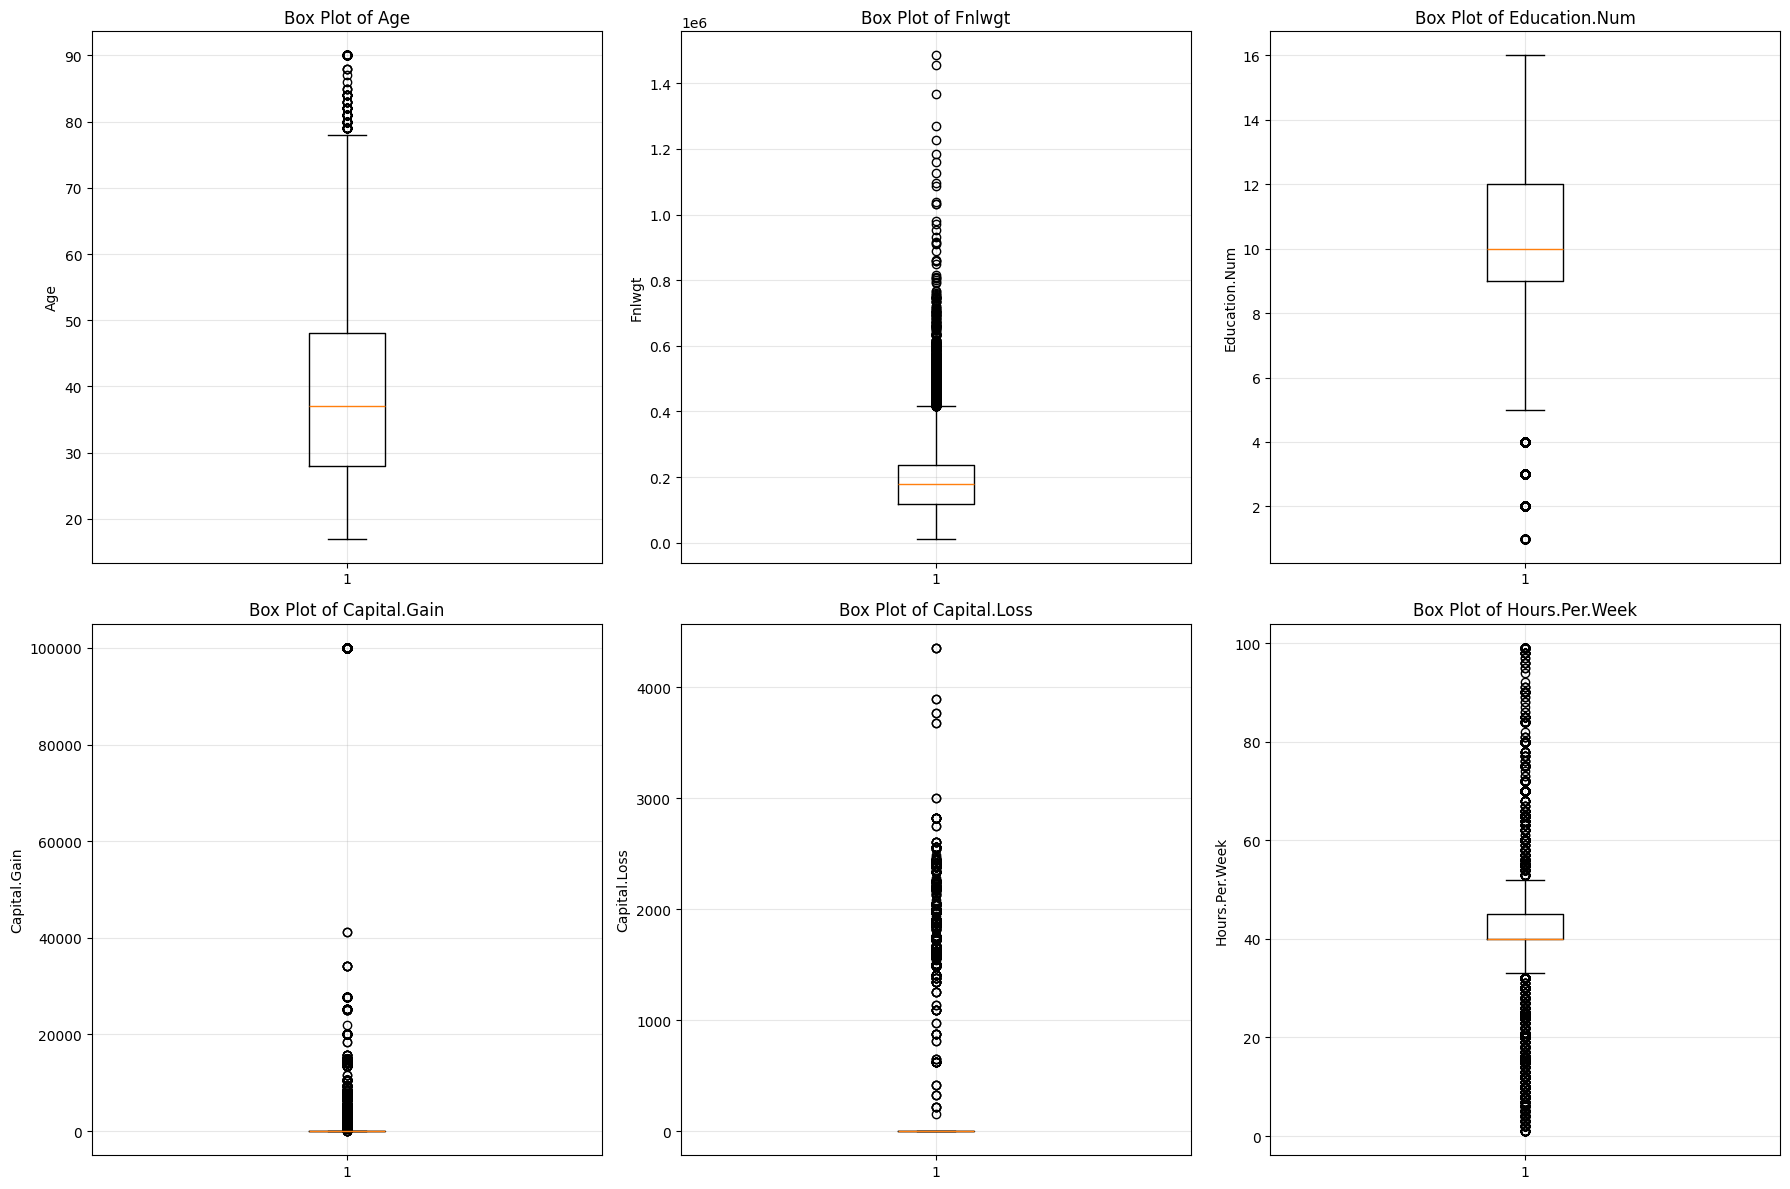

In [107]:
# Box plots to identify outliers
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, var in enumerate(numerical_vars):
    axes[i].boxplot(df[var].dropna())
    axes[i].set_title(f'Box Plot of {var.replace("_", " ").title()}')
    axes[i].set_ylabel(var.replace("_", " ").title())
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

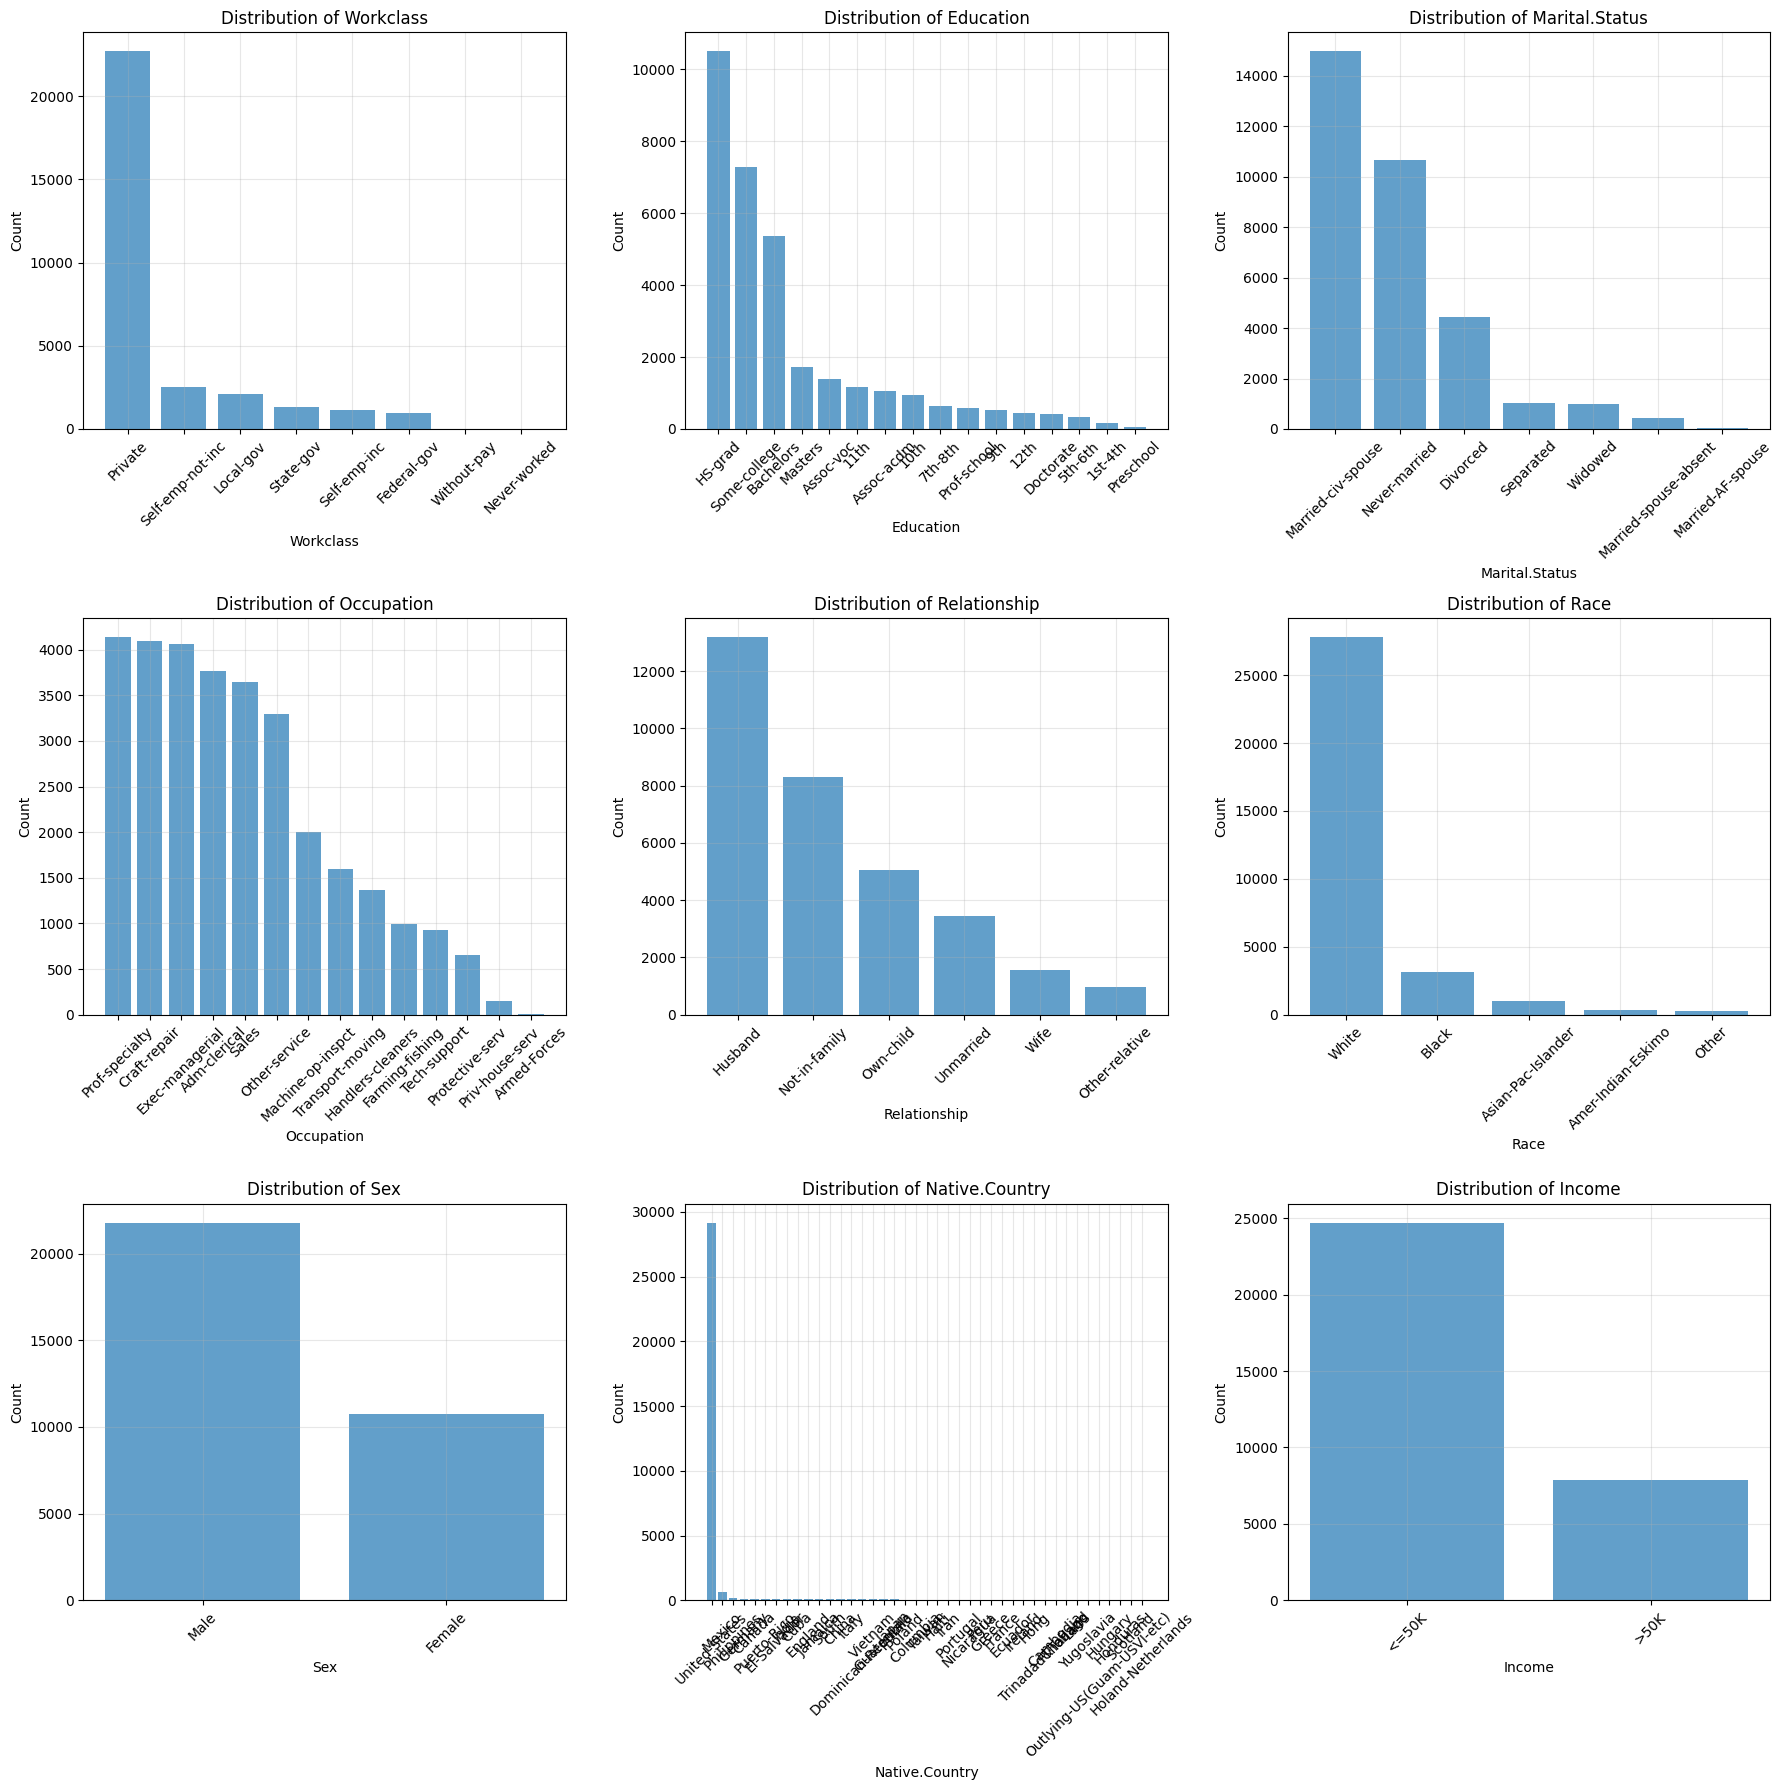

In [108]:
# Bar plots for categorical variables
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
axes = axes.ravel()

for i, var in enumerate(categorical_cols):
    value_counts = df[var].value_counts()
    axes[i].bar(value_counts.index, value_counts.values, alpha=0.7)
    axes[i].set_title(f'Distribution of {var.replace("_", " ").title()}')
    axes[i].set_xlabel(var.replace("_", " ").title())
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

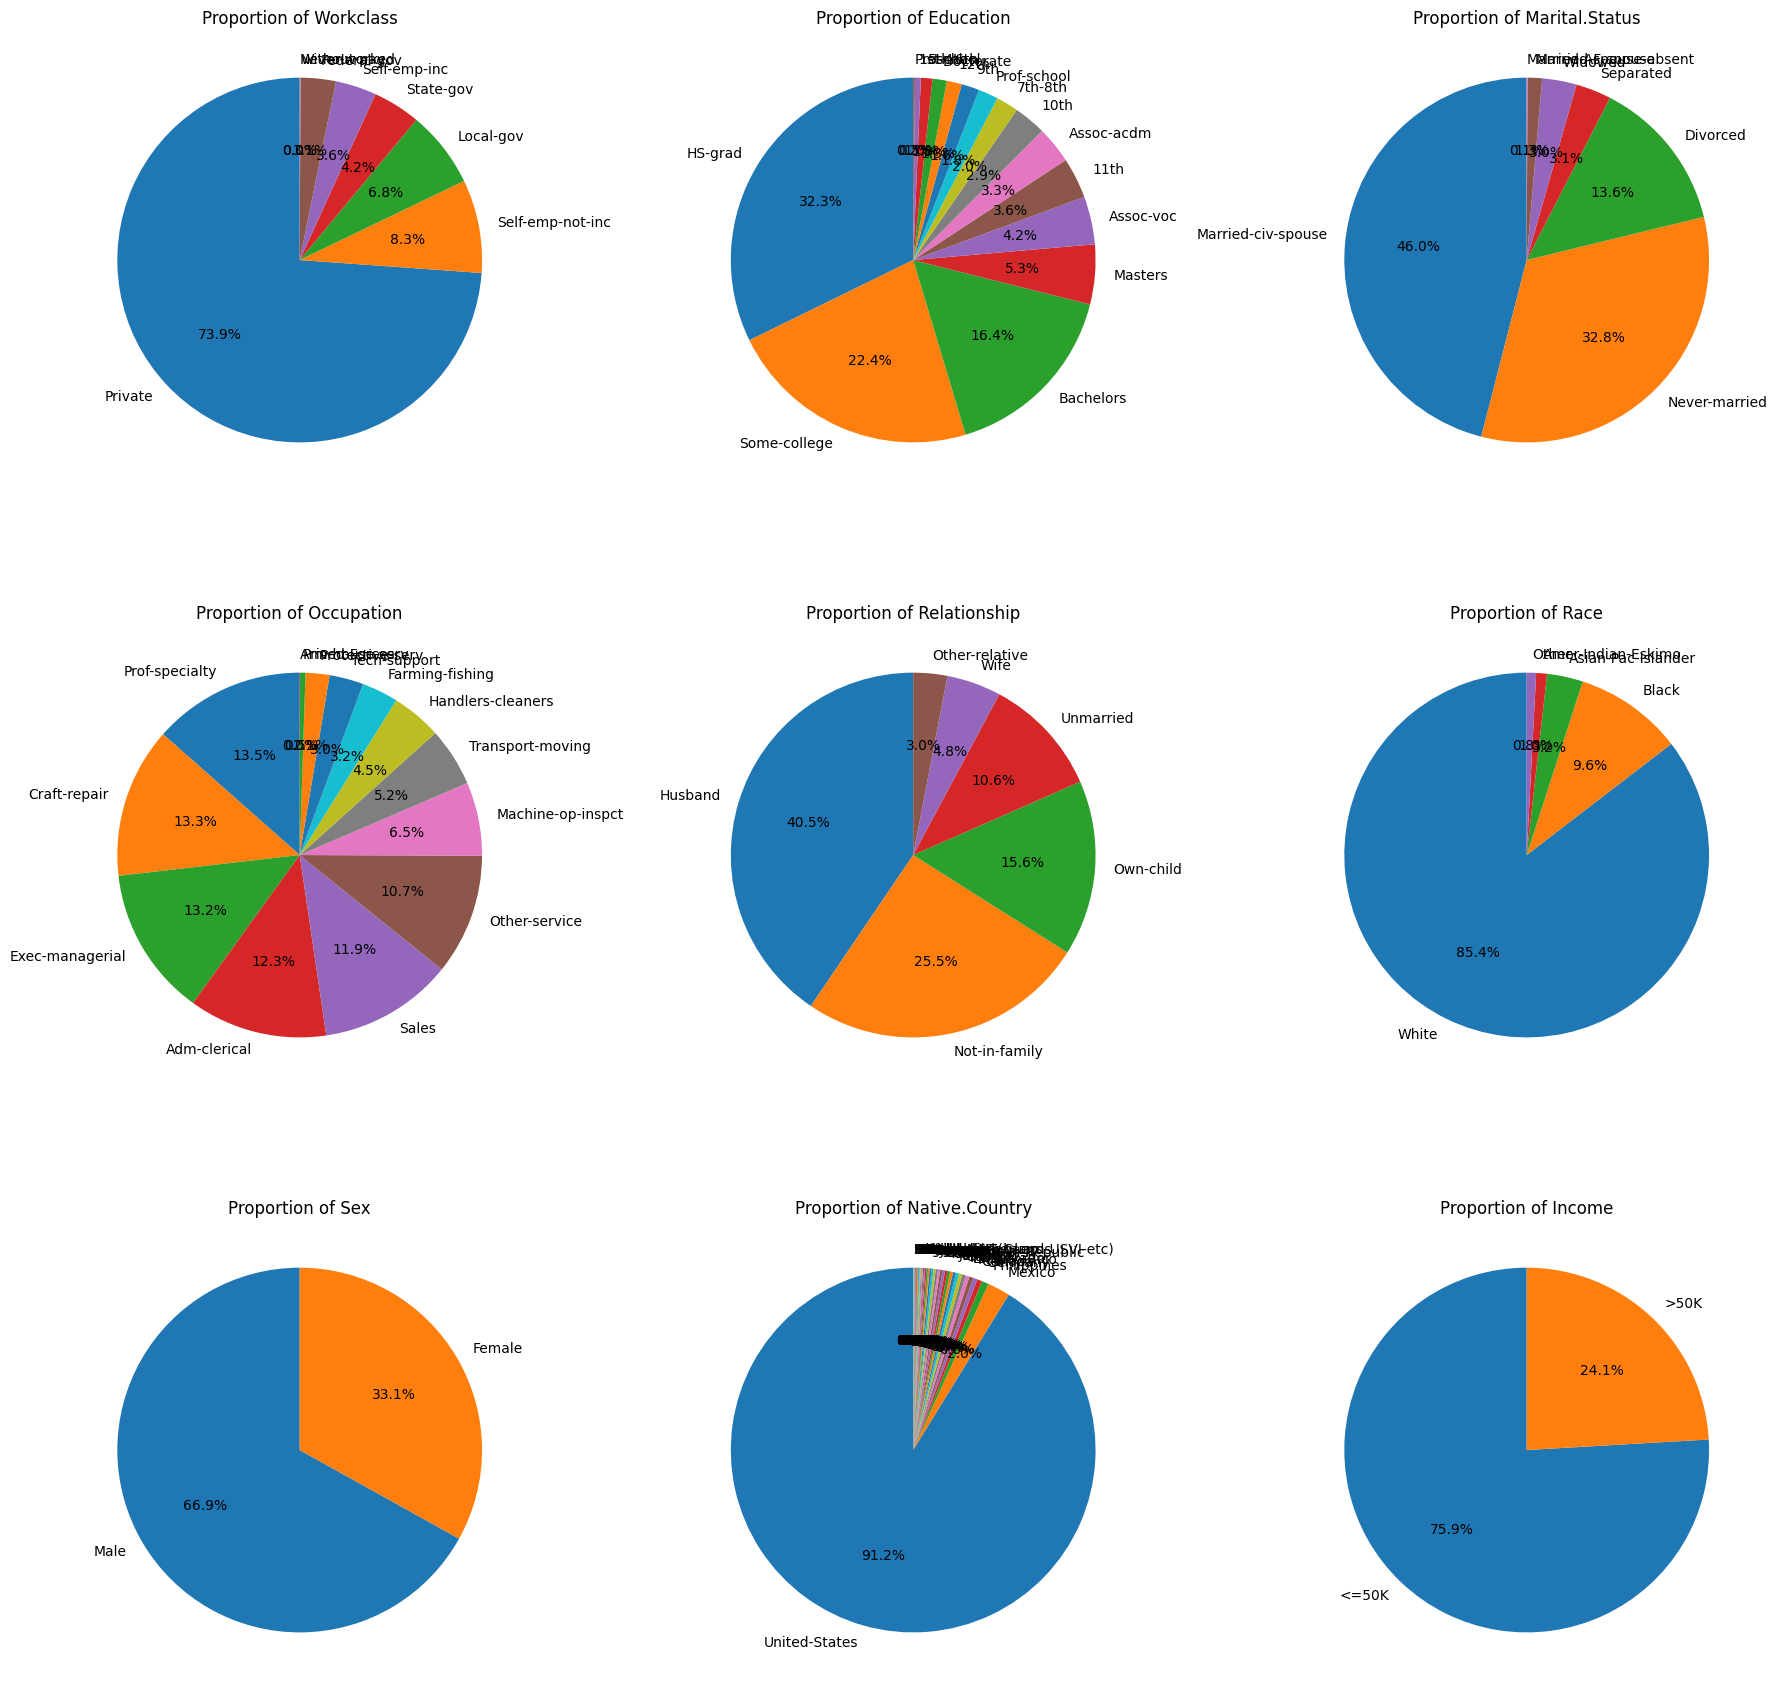

In [109]:
# Pie charts for categorical variables
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
axes = axes.ravel()

for i, var in enumerate(categorical_cols):
    value_counts = df[var].value_counts()
    axes[i].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Proportion of {var.replace("_", " ").title()}')

plt.tight_layout()
plt.show()

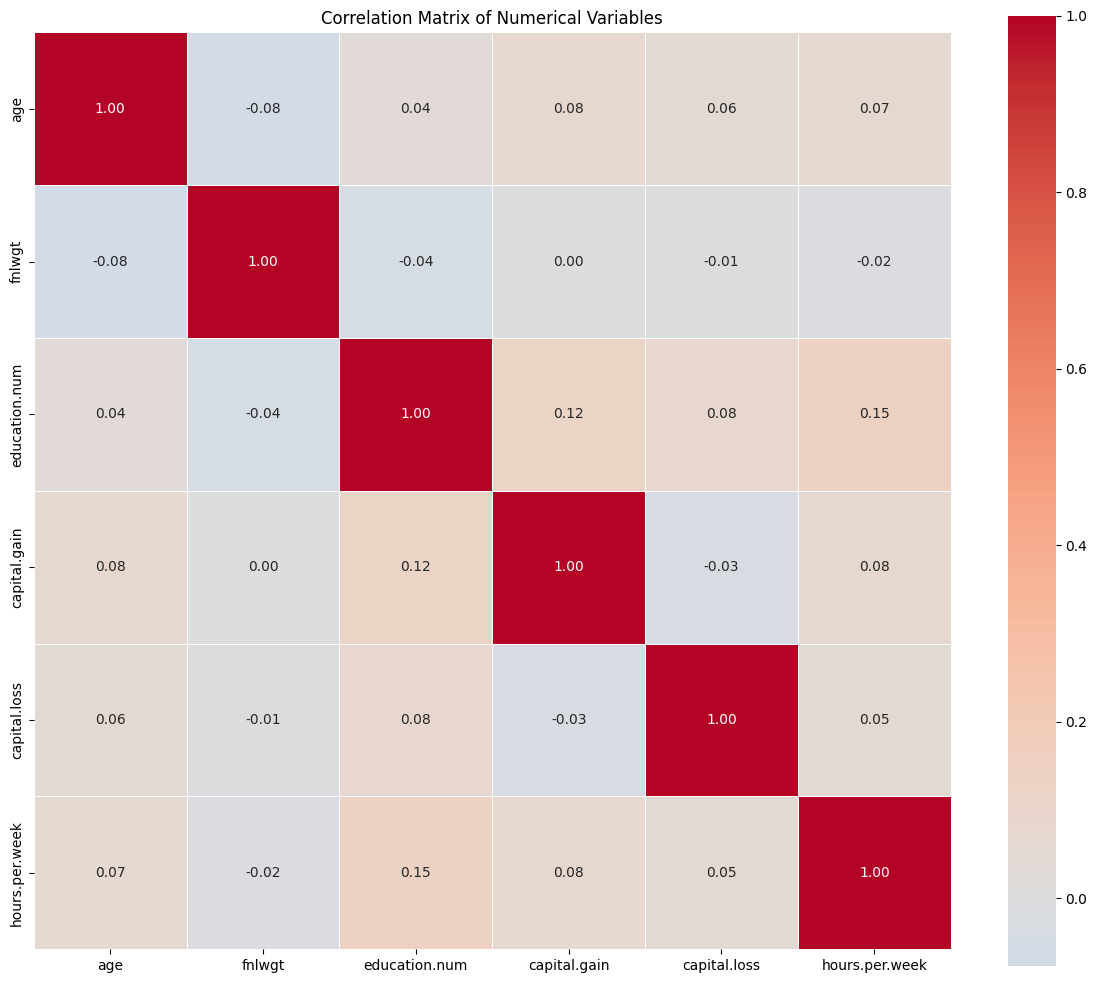

Strong Correlations (|r| > 0.5):


In [110]:
# Correlation matrix
import seaborn as sns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

# Print strong correlations
print("Strong Correlations (|r| > 0.5):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.5:
            print(f"{correlation_matrix.columns[i]} vs {correlation_matrix.columns[j]}: {corr_value:.3f}")

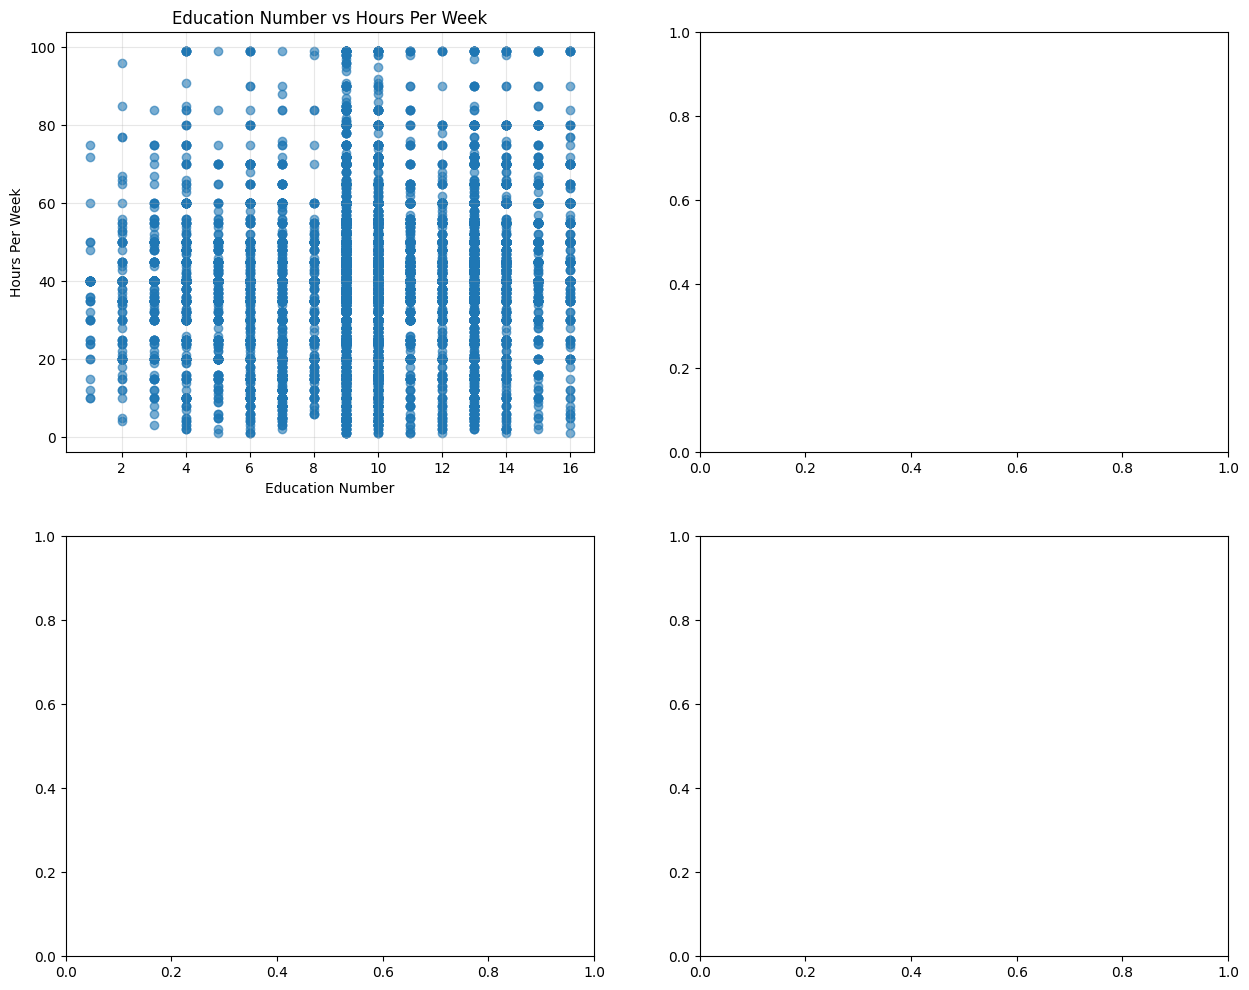

In [111]:
# Scatter plots for key relationships
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv('adult.csv')

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Education vs hours per week
axes[0, 0].scatter(df['education.num'], df['hours.per.week'], alpha=0.6)
axes[0, 0].set_xlabel('Education Number')
axes[0, 0].set_ylabel('Hours Per Week')
axes[0, 0].set_title('Education Number vs Hours Per Week')
axes[0, 0].grid(True, alpha=0.3)

In [112]:
# Install required packages
!pip install --upgrade pip
!pip install pandas numpy matplotlib seaborn scikit-learn

In [113]:
# Comprehensive data quality report
def data_quality_report(df):
    print("=== DATA QUALITY REPORT ===")
    print(f"\n📊 Dataset Overview:")
    print(f"   • Shape: {df.shape}")
    print(f"   • Memory usage: {df.memory_usage(deep=True).sum() / 1024:.1f} KB")

    print(f"\n🔍 Missing Values:")
    missing_data = df.isnull().sum()
    missing_percent = (missing_data / len(df)) * 100

    for col in missing_data[missing_data > 0].index:
        print(f"   • {col}: {missing_data[col]} ({missing_percent[col]:.1f}%)")

    print(f"\n📈 Data Types:")
    print(f"   • Numerical columns: {len(df.select_dtypes(include=[np.number]).columns)}")
    print(f"   • Categorical columns: {len(df.select_dtypes(include=['object']).columns)}")

    print(f"\n🎯 Potential Issues:")
    # Check for duplicates
    duplicates = len(df) - len(df.drop_duplicates())
    if duplicates > 0:
        print(f"   • Duplicate rows: {duplicates}")

    # Check for outliers in numerical columns
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = len(df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)])
        if outliers > 0:
            print(f"   • {col} outliers: {outliers} ({outliers/len(df)*100:.1f}%)")

data_quality_report(df)

=== DATA QUALITY REPORT ===

📊 Dataset Overview:
   • Shape: (32561, 15)
   • Memory usage: 18070.4 KB

🔍 Missing Values:

📈 Data Types:
   • Numerical columns: 6
   • Categorical columns: 9

🎯 Potential Issues:
   • Duplicate rows: 24
   • age outliers: 143 (0.4%)
   • fnlwgt outliers: 992 (3.0%)
   • education.num outliers: 1198 (3.7%)
   • capital.gain outliers: 2712 (8.3%)
   • capital.loss outliers: 1519 (4.7%)
   • hours.per.week outliers: 9008 (27.7%)


In [114]:
import pandas as pd
import numpy as np

# Convertir los "?" en NaN
df.replace("?", np.nan, inplace=True)


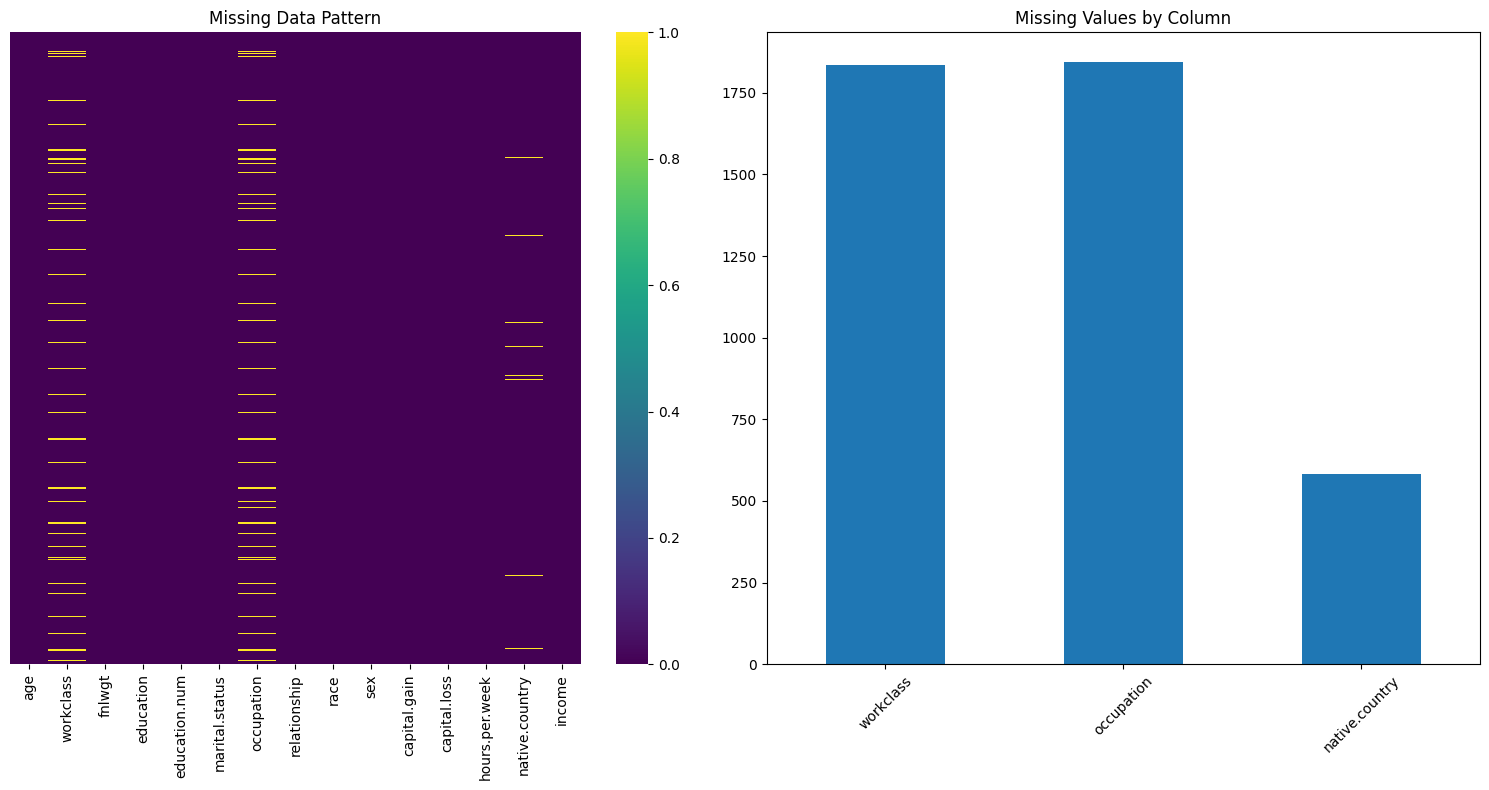

In [115]:
# Visualize missing data patterns
plt.figure(figsize=(15, 8))

# Missing data heatmap
plt.subplot(1, 2, 1) # Adjusted subplot layout
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Data Pattern')

# Missing data bar plot (only plot if there are missing values)
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]

if not missing_counts.empty:
    plt.subplot(1, 2, 2) # Adjusted subplot layout
    missing_counts.plot(kind='bar')
    plt.title('Missing Values by Column')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [116]:
# Identify categorical columns
df_processed = df.copy()
categorical_columns = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']
print("Categorical columns to encode:")
for col in categorical_columns:
    print(f"• {col}: {df_processed[col].nunique()} unique values")
    print(f"  Values: {list(df_processed[col].unique())}")
    print()

Categorical columns to encode:
• workclass: 8 unique values
  Values: [nan, 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc', 'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked']

• education: 16 unique values
  Values: ['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate', 'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm', 'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool']

• marital.status: 7 unique values
  Values: ['Widowed', 'Divorced', 'Separated', 'Never-married', 'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']

• occupation: 14 unique values
  Values: [nan, 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty', 'Other-service', 'Adm-clerical', 'Craft-repair', 'Transport-moving', 'Handlers-cleaners', 'Sales', 'Farming-fishing', 'Tech-support', 'Protective-serv', 'Armed-Forces', 'Priv-house-serv']

• relationship: 6 unique values
  Values: ['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative', 'Husband', 'Wi

In [120]:
# Education level has a natural order
def simplify_education(level):
    if level in ['Preschool', '1st-4th', '5th-6th', '7th-8th']:
        return 'Low'
    elif level in ['9th', '10th', '11th', '12th', 'HS-grad']:
        return 'High School'
    elif level in ['Some-college', 'Assoc-voc', 'Assoc-acdm']:
        return 'Some College'
    elif level in ['Masters', 'Prof-school', 'Doctorate']:
        return 'Post Grad'
    elif level in ['Bachelors']:
        return 'Bachelor'
    else:
        return 'Unknown'

# Apply the simplification
df_processed['education_level_simplified'] = df_processed['education'].apply(simplify_education)

# Show counts for each new category
print(df_processed['education_level_simplified'].value_counts())

# Crear un diccionario de mapeo: nivel educativo → número ordinal
education_mapping = {level: i for i, level in enumerate(df_processed['education_level_simplified'].unique())}

# Aplicar el mapeo a la columna 'education_level_simplified' del DataFrame
df_processed['education_level_encoded'] = df_processed['education_level_simplified'].map(education_mapping)

simplified_ordinal_mapping = {
    'Low': 1,
    'High School': 2,
    'Some College': 3,
    'Bachelor': 4,
    'Post Grad': 5
}

# Apply the mapping to create the ordinal column
df_processed['education_level_encoded'] = df_processed['education_level_simplified'].map(simplified_ordinal_mapping)

# Show the mapping
print("Ordinal Encoding for Simplified Education Levels:")
for category, code in simplified_ordinal_mapping.items():
    print(f"  {category} → {code}")

# Optional: check counts
print("\nCounts per ordinal category:")
print(df_processed['education_level_encoded'].value_counts())

#showme the data set with the new values
df_processed.head()

education_level_simplified
High School     13556
Some College     9740
Bachelor         5355
Post Grad        2712
Low              1198
Name: count, dtype: int64
Ordinal Encoding for Simplified Education Levels:
  Low → 1
  High School → 2
  Some College → 3
  Bachelor → 4
  Post Grad → 5

Counts per ordinal category:
education_level_encoded
2    13556
3     9740
4     5355
5     2712
1     1198
Name: count, dtype: int64


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,education_level_simplified,education_level_encoded,simplify_education
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K,High School,2,High School
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,High School,2,High School
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K,Some College,3,Some College
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,Low,1,Low
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,Some College,3,Some College
